# Part 1:
## 1.1 Load and Inspect the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

df_customers = pd.read_csv('customers.csv')

In [2]:
print("--- First 10 Rows ---")
print(df_customers.head(10))

--- First 10 Rows ---
   CustomerID  gender  age  yearly income  pruchase spending
0           1    Male   19             15                 39
1           2    Male   21             15                 81
2           3  Female   20             16                  6
3           4  Female   23             16                 77
4           5  Female   31             17                 40
5           6  Female   22             17                 76
6           7  Female   35             18                  6
7           8  Female   23             18                 94
8           9    Male   64             19                  3
9          10  Female   30             19                 72


## 1.2 Data Shape, Types, and Quality

In [3]:
df_customers.rename(columns={
    'gender': 'Gender',
    'age': 'Age',
    'yearly income': 'Yearly income',
    'pruchase spending': 'Purchase spending'
}, inplace=True)

print("\n--- Column Names (Cleaned) ---")
print(df_customers.columns)


--- Column Names (Cleaned) ---
Index(['CustomerID', 'Gender', 'Age', 'Yearly income', 'Purchase spending'], dtype='object')


## 1.3 Data Cleaning and Statistical Summary

In [4]:
print("\n--- DataFrame Shape ---")
print(df_customers.shape)

print("\n--- Data Types (dtypes) ---")
print(df_customers.info())

print("\n--- Missing (isnull) Values ---")
print(df_customers.isnull().sum())

print("\n--- Duplicate Values ---")
print(df_customers.duplicated().sum())


--- DataFrame Shape ---
(200, 5)

--- Data Types (dtypes) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         200 non-null    int64 
 1   Gender             200 non-null    object
 2   Age                200 non-null    int64 
 3   Yearly income      200 non-null    int64 
 4   Purchase spending  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

--- Missing (isnull) Values ---
CustomerID           0
Gender               0
Age                  0
Yearly income        0
Purchase spending    0
dtype: int64

--- Duplicate Values ---
0


In [5]:
df_customers = df_customers.drop(["CustomerID"], axis = 1)

print("\n--- DataFrame After Dropping CustomerID ---")
print(df_customers.head())


--- DataFrame After Dropping CustomerID ---
   Gender  Age  Yearly income  Purchase spending
0    Male   19             15                 39
1    Male   21             15                 81
2  Female   20             16                  6
3  Female   23             16                 77
4  Female   31             17                 40


In [6]:
print("\n--- Statistical Summary (Numerical Features) ---")
print(df_customers.describe())


print("\n--- Statistical Summary (Categorical Features) ---")
print(df_customers['Gender'].value_counts())


--- Statistical Summary (Numerical Features) ---
              Age  Yearly income  Purchase spending
count  200.000000     200.000000         200.000000
mean    38.850000      60.560000          50.200000
std     13.969007      26.264721          25.823522
min     18.000000      15.000000           1.000000
25%     28.750000      41.500000          34.750000
50%     36.000000      61.500000          50.000000
75%     49.000000      78.000000          73.000000
max     70.000000     137.000000          99.000000

--- Statistical Summary (Categorical Features) ---
Gender
Female    112
Male       88
Name: count, dtype: int64


# PART 2: 
## GRAPHICAL DATA REPRESENTATION (DATA VISUALIZATION)

## 2.1 Univariate Analysis

C:\Users\Saad\AppData\Local\Temp\ipykernel_19308\841109890.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


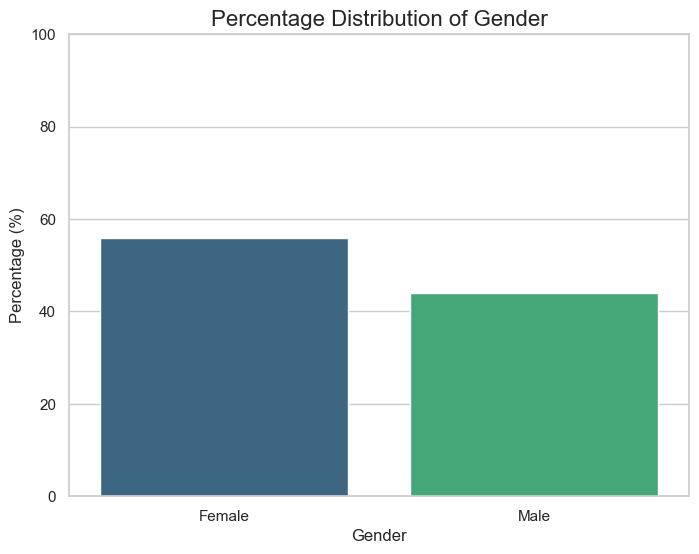

In [7]:
# Set the global style for all plots
sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))
gender_counts = df_customers['Gender'].value_counts(normalize=True) * 100
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Percentage Distribution of Gender', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylim(0, 100)
plt.show()

### Analysis:
The plot shows a slight imbalance in the dataset, with **Females representing 56%** of the customers and **Males representing 44%**.

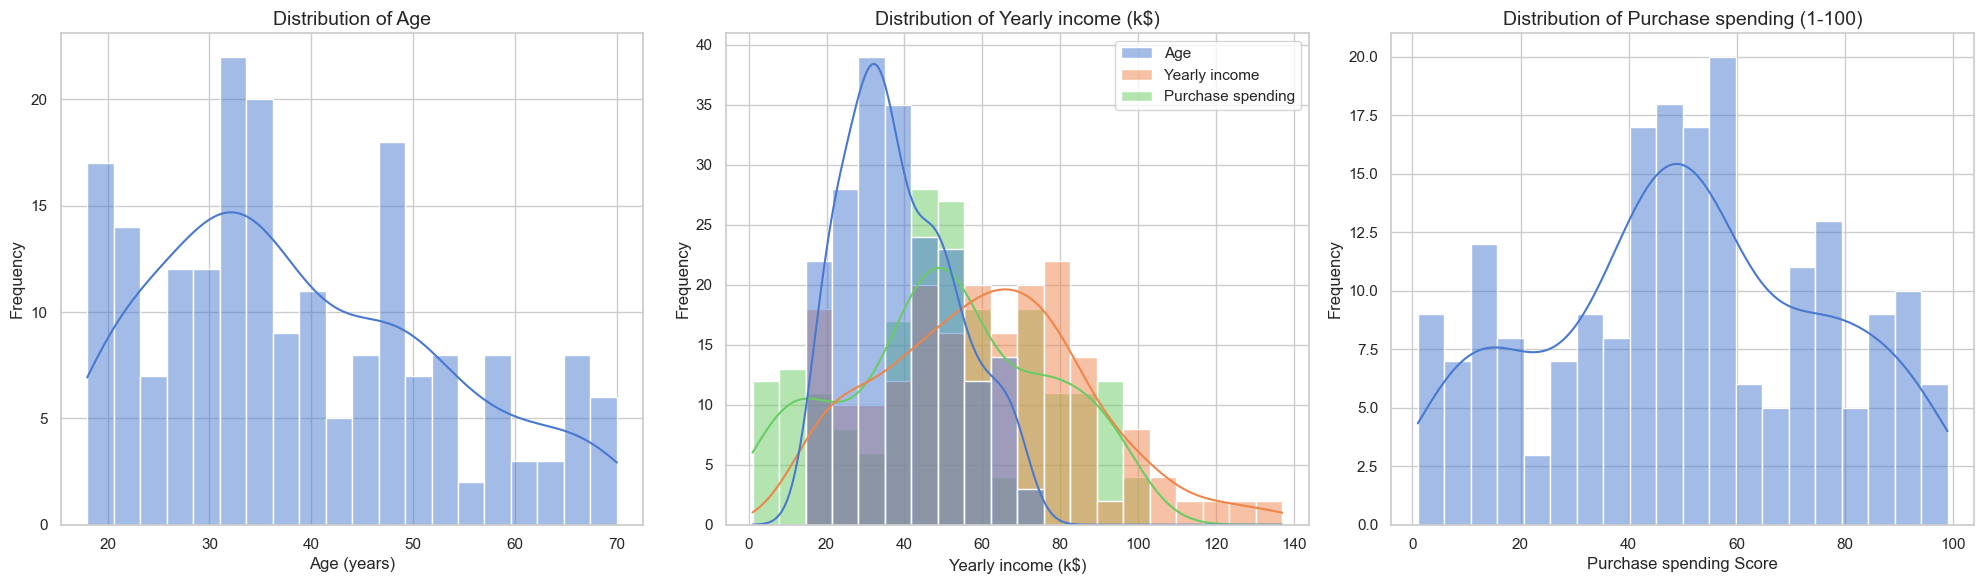

In [8]:
plt.figure(figsize=(20, 6))
sns.set_palette("muted")

# Plot for Age
plt.subplot(1, 3, 1)
sns.histplot(df_customers['Age'], kde=True, bins=20)
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot for Yearly income
plt.subplot(1, 3, 2)
sns.histplot(df_customers, kde=True, bins=20)
plt.title('Distribution of Yearly income (k$)', fontsize=14)
plt.xlabel('Yearly income (k$)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot for Purchase spending
plt.subplot(1, 3, 3)
sns.histplot(df_customers['Purchase spending'], kde=True, bins=20)
plt.title('Distribution of Purchase spending (1-100)', fontsize=14)
plt.xlabel('Purchase spending Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

### Analysis:

- **Age**: The distribution is right-skewed, indicating a larger population of younger customers (20s-40s) than older customers.

- **Yearly income**: This distribution is relatively normal but with a slight right-skew. Most customers earn between 40k and 80k, with a few high-earning outliers.

- **Purchase spending**: This distribution is the most interesting. It is multimodal and relatively uniform, with prominent peaks around 40-60 but also significant counts at the low end (20) and high end (80). This suggests there are distinct groups of low, medium, and high spenders, rather than a single "average" customer.

## 2.2 Bivariate Analysis

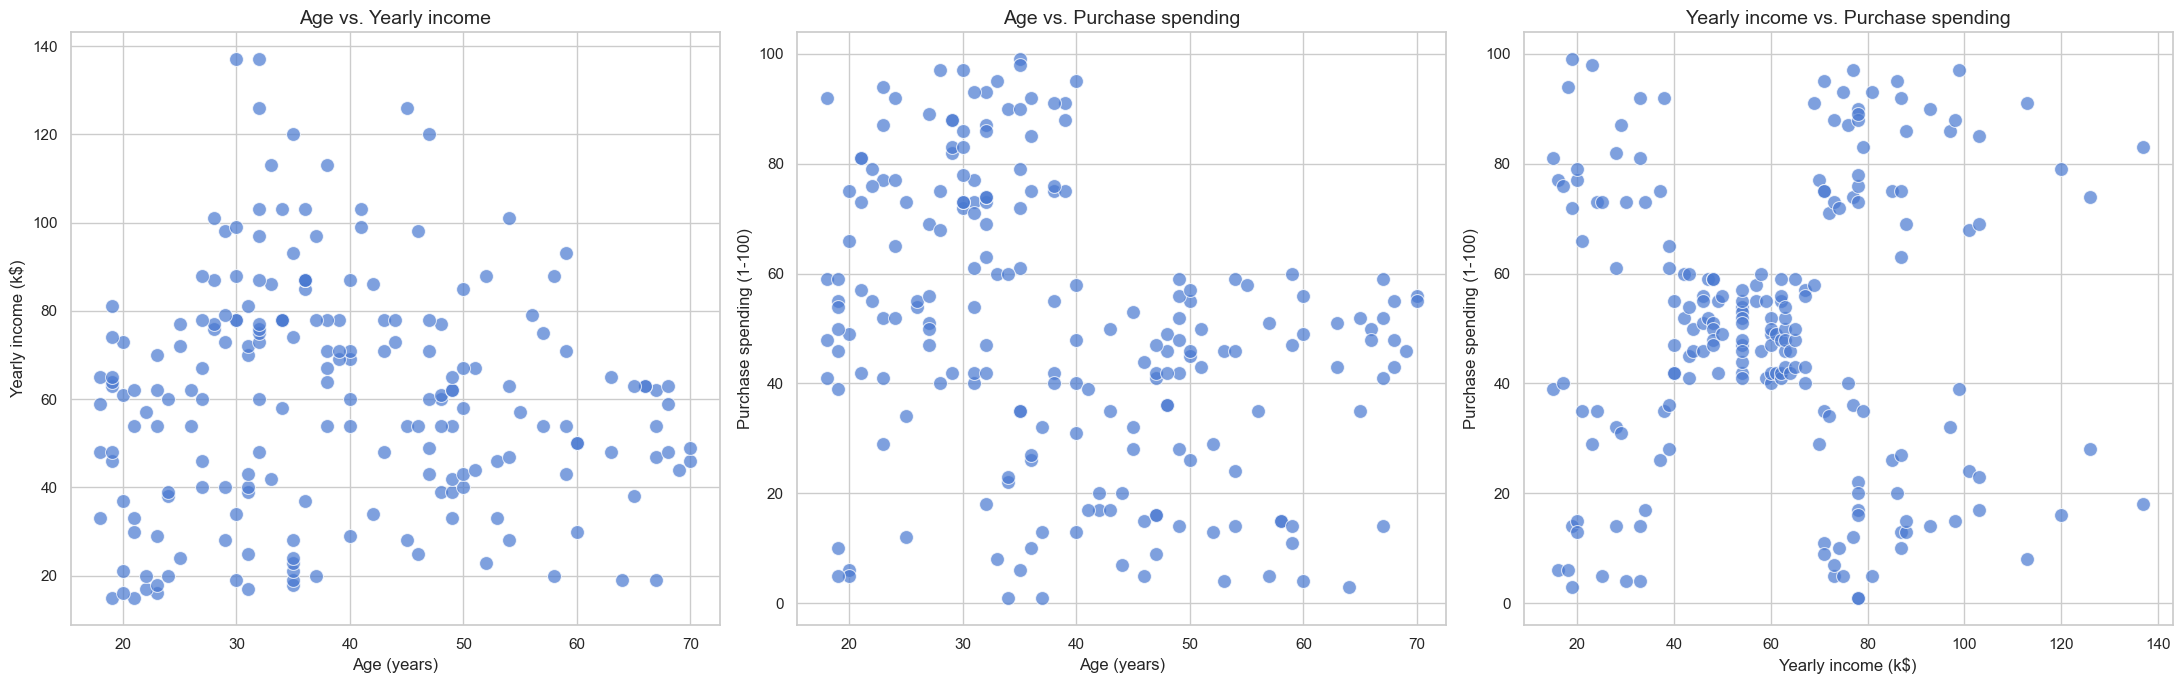

In [9]:
plt.figure(figsize=(22, 7))

# Age vs. Yearly income
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_customers, x='Age', y='Yearly income', s=100, alpha=0.7)
plt.title('Age vs. Yearly income', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Yearly income (k$)', fontsize=12)

# Age vs. Purchase spending
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_customers, x='Age', y='Purchase spending', s=100, alpha=0.7)
plt.title('Age vs. Purchase spending', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Purchase spending (1-100)', fontsize=12)

# Yearly income vs. Purchase spending
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_customers, x='Yearly income', y='Purchase spending', s=100, alpha=0.7)
plt.title('Yearly income vs. Purchase spending', fontsize=14)
plt.xlabel('Yearly income (k$)', fontsize=12)
plt.ylabel('Purchase spending (1-100)', fontsize=12)

plt.tight_layout()
plt.show()

### Analysis:

- **Age vs. Yearly income**: No strong linear correlation is apparent. The income levels are spread across all age groups.

- **Age vs. Purchase spending**: A weak pattern emerges. It appears that younger customers (under 40) have a higher tendency for high spending scores, while older customers (over 40) tend to have more moderate spending scores.

- **Yearly income vs. Purchase spending**: This is the most informative plot, revealing clear, distinct groupings.


### Question:
Based on the Yearly Income vs. purchase spending scatter plot, how many natural groups or clusters do you visually identify?

### Answer: 
The Yearly income vs. Purchase spending scatter plot reveals **five distinct, natural clusters**. These groups are visibly separated and can be described as:

1. **Top-Left**: A cluster of customers with High Income but Low Spending.

2. **Top-Right**: A cluster of customers with High Income and High Spending.

3. **Bottom-Left**: A dense cluster of customers with Low Income and Low Spending.

4. **Bottom-Right**: A cluster of customers with Low Income but High Spending.

5. **Center**: A large, dense, and centrally-located cluster of customers with Middle Income and Middle Spending.

## 2.3 Multivariate Analysis

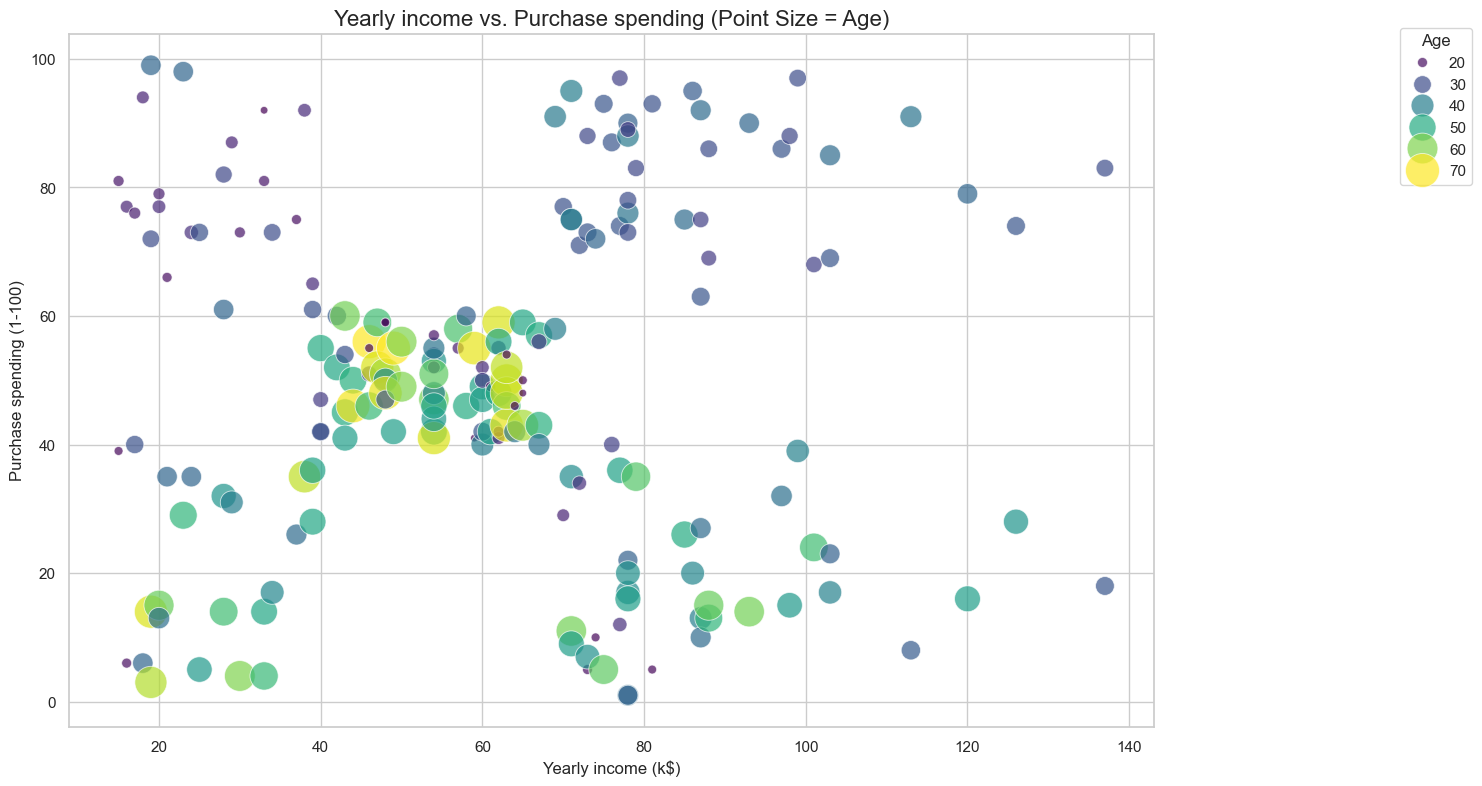

In [10]:
# Plot Yearly income vs. Purchase spending, using Age to determine point size.
plt.figure(figsize=(14, 9))
sns.scatterplot(data=df_customers, 
                x='Yearly income', 
                y='Purchase spending', 
                size='Age',        # Use Age to determine point size
                hue='Age',         # Also use Age for color for better visibility
                sizes=(30, 600),   # Define min/max bubble size
                alpha=0.7,
                palette="viridis")
plt.title('Yearly income vs. Purchase spending (Point Size = Age)', fontsize=16)
plt.xlabel('Yearly income (k$)', fontsize=12)
plt.ylabel('Purchase spending (1-100)', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02), title='Age')
plt.show()

### Analysis: 
This plot validates the findings from Task 2.2 and adds a new dimension.

- The "**Low Income, High Spending**" cluster (bottom-right) is almost entirely composed of small bubbles, confirming this group consists of **younger customers**.

- The "**Low Income, Low Spending**" cluster (bottom-left) has a mix of bubble sizes, but skews younger.

- The "**High Income, Low Spending**" cluster (top-left) is dominated by large bubbles, indicating this group consists of **older, more cautious customers**.

- The central and top-right clusters ("Average" and "VIPs") have a wider mix of ages.

# PART 3: 
## K-MEANS CLUSTERING ON 2-FEATURE COMBINATIONS

## 3.1 Clustering by Age and Purchase Spending

D:\Users\Saad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saad\AppData\Local\Temp\ipykernel_19308\158700034.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_spend['Cluster'] = kmeans_age.labels_


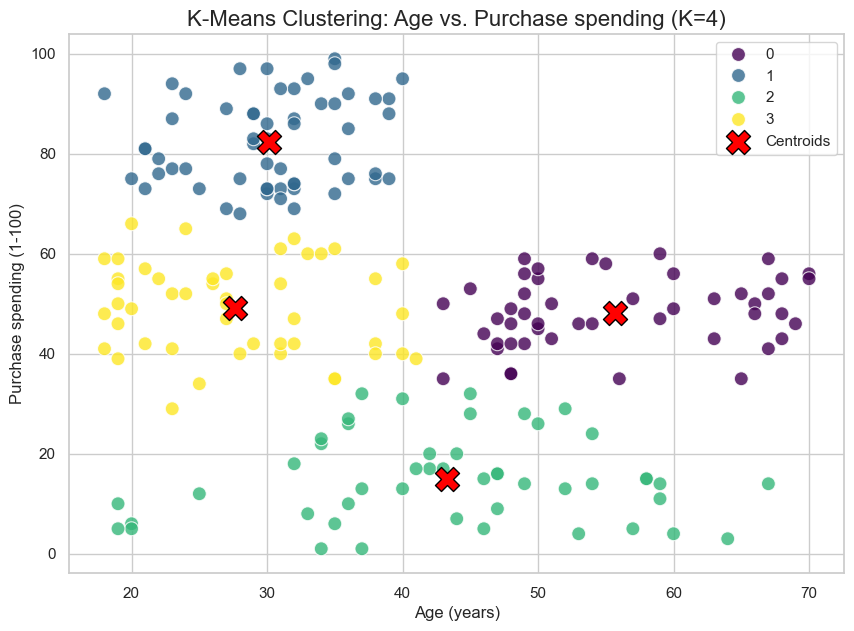

In [11]:
df_age_spend = df_customers[['Age', 'Purchase spending']]

# n_init=10 is used to run the algorithm 10 times with different
# centroid initializations to find the best result.
kmeans_age = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_age.fit(df_age_spend)


df_age_spend['Cluster'] = kmeans_age.labels_

# Visualize the results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_age_spend, x='Age', y='Purchase spending', hue='Cluster', 
                palette='viridis', s=100, alpha=0.8)

# Mark the cluster centers (centroids)
centroids_age = kmeans_age.cluster_centers_
plt.scatter(centroids_age[:, 0], centroids_age[:, 1], s=300, c='red', 
            marker='X', label='Centroids', edgecolors='black')

plt.title('K-Means Clustering: Age vs. Purchase spending (K=4)', fontsize=16)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Purchase spending (1-100)', fontsize=12)
plt.legend()
plt.show()

### Question: 
Briefly describe the four customer groups identified in this step.

### Answer: 
Based on the scatter plot and centroid locations, the four customer groups are:

1. **Cluster 0 (Dark Blue)**: **Young, High Spenders**. This group has a low-to-mid age (approx. 20-40) and a high spending score (approx. 70-100).

2. **Cluster 1 (Green)**: **Older, Mid-Spenders**. This group consists of older customers (approx. 40-70) with a moderate spending score (approx. 40-60).

3. **Cluster 2 (Teal)**: **Young, Low Spenders**. This group has a low-to-mid age (approx. 20-40) and a low spending score (approx. 0-30).

4. **Cluster 3 (Yellow)**: **All Ages, Mid-Spender**s. This is a more general group with a low-to-mid spending score (approx. 30-60) spanning a wide age range (approx. 18-70).

## 3.2 Clustering by Yearly Income and Purchase Spending

D:\Users\Saad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Saad\AppData\Local\Temp\ipykernel_19308\945496555.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inc_spend['Cluster'] = kmeans_inc.labels_


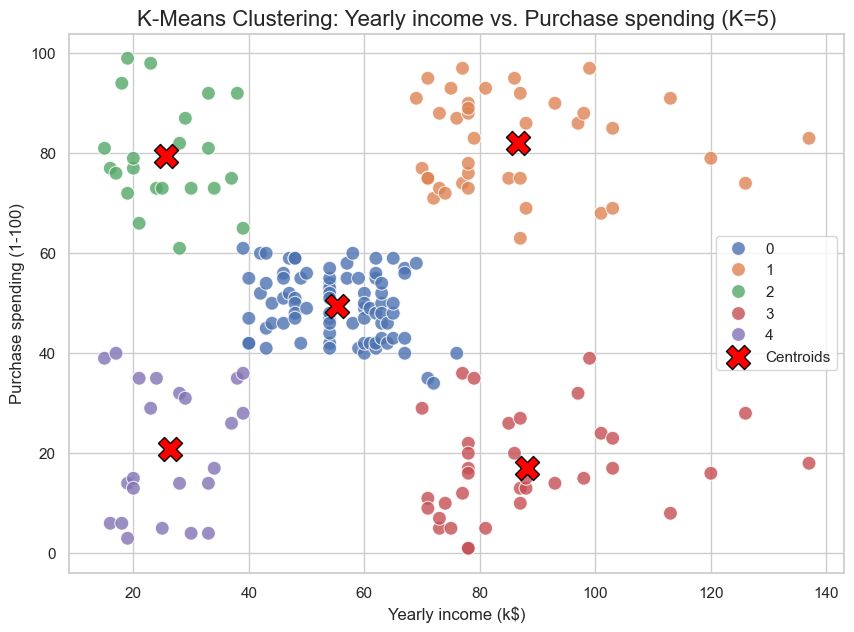

In [12]:
# Select the two features
df_inc_spend = df_customers[['Yearly income', 'Purchase spending']]


kmeans_inc = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_inc.fit(df_inc_spend)


df_inc_spend['Cluster'] = kmeans_inc.labels_

# Visualize the results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_inc_spend, x='Yearly income', y='Purchase spending', hue='Cluster', 
                palette='deep', s=100, alpha=0.8)

# Mark the cluster centers (centroids)
centroids_inc = kmeans_inc.cluster_centers_
plt.scatter(centroids_inc[:, 0], centroids_inc[:, 1], s=300, c='red', 
            marker='X', label='Centroids', edgecolors='black')

plt.title('K-Means Clustering: Yearly income vs. Purchase spending (K=5)', fontsize=16)
plt.xlabel('Yearly income (k$)', fontsize=12)
plt.ylabel('Purchase spending (1-100)', fontsize=12)
plt.legend()
plt.show()

### Question: 
These five clusters are often considered the most valuable for marketing. Give each of the five clusters a descriptive name (e.g., "High Income, Low Spenders").

### Answer: 
The K-Means algorithm successfully identified and partitioned the five visually distinct groups. Based on their centroid positions, these clusters are given descriptive personas, which are essential for translating data analysis into actionable marketing strategy:

- **VIPs** (High Income, High Spending)

- **Frugal Rich** (High Income, Low Spending)

- **Young Potentials** (Low Income, High Spending)

- **Average Core** (Middle Income, Middle Spending)

- **Cautious Mass** (Low Income, Low Spending)

# PART 4: 
## COMPREHENSIVE K-MEANS CLUSTERING ON 3 FEATURES

## 4.1 Data Preparation

In [13]:
df_numeric = df_customers.drop(columns=['Gender'])
print("--- Data for 3-Feature Clustering ---")
print(df_numeric.head())

--- Data for 3-Feature Clustering ---
   Age  Yearly income  Purchase spending
0   19             15                 39
1   21             15                 81
2   20             16                  6
3   23             16                 77
4   31             17                 40


## 4.2 Data Scaling

In [14]:
scaler = MinMaxScaler()


data_scaled = scaler.fit_transform(df_numeric)

# Convert the scaled data (a NumPy array) back to a DataFrame for convenience
df_scaled = pd.DataFrame(data_scaled, columns=df_numeric.columns)

print("\n--- Scaled Data (First 5 Rows) ---")
print(df_scaled.head())

print("\n--- Statistical Summary of Scaled Data ---")
print(df_scaled.describe())


--- Scaled Data (First 5 Rows) ---
        Age  Yearly income  Purchase spending
0  0.019231       0.000000           0.387755
1  0.057692       0.000000           0.816327
2  0.038462       0.008197           0.051020
3  0.096154       0.008197           0.775510
4  0.250000       0.016393           0.397959

--- Statistical Summary of Scaled Data ---
              Age  Yearly income  Purchase spending
count  200.000000     200.000000         200.000000
mean     0.400962       0.373443           0.502041
std      0.268635       0.215285           0.263505
min      0.000000       0.000000           0.000000
25%      0.206731       0.217213           0.344388
50%      0.346154       0.381148           0.500000
75%      0.596154       0.516393           0.734694
max      1.000000       1.000000           1.000000


## 4.3 Find the Optimal Number of Clusters (K)

D:\Users\Saad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\Saad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\Saad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\Saad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

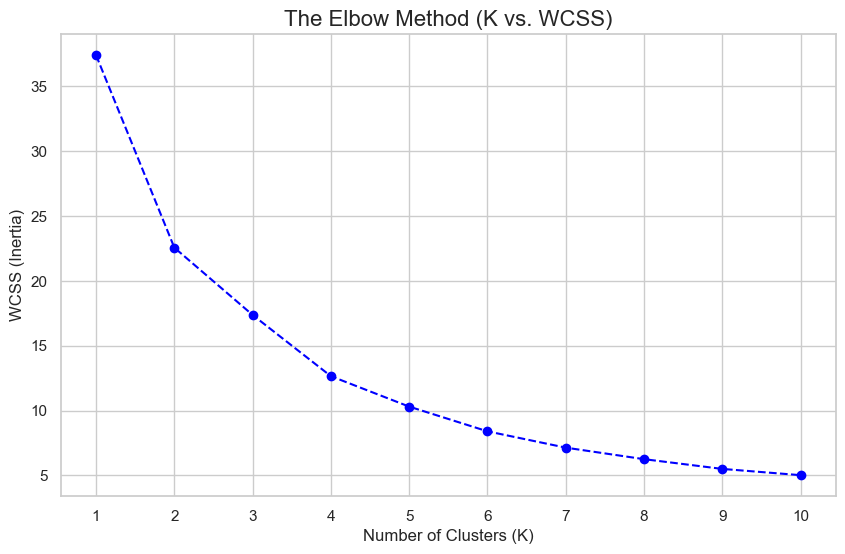

In [15]:
# We will use the Elbow Method on the 3-feature SCALED data.

wcss =  []
k_range = range(1, 11)

for k in k_range:
    
    kmeans_loop = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    kmeans_loop.fit(df_scaled)

    wcss.append(kmeans_loop.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='blue')
plt.title('The Elbow Method (K vs. WCSS)', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Inertia)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

### Question: 
Identify the "elbow" point. What is the optimal value for K?

### Answer: 
The plot shows the WCSS (Inertia) decreasing with each added cluster. The "elbow" is the point where the rate of decrease slows down dramatically, forming a "bend" like an arm.

- From K=1 to K=2, the drop is massive.

- The drops from K=2 to K=3, K=3 to K=4, and K=4 to K=5 are all significant.

- After K=5, the rate of decrease flattens noticeably. The drop from K=5 to K=6 is much less pronounced than the drop from K=4 to K=5.

While K=6 is also a candidate, the clearest "elbow" point, where the marginal gain in model fit drops off, is at **K=5**. Therefore, the optimal value for K is 5.

## 4.4 Apply K-Means Algorithm

In [16]:
# Set the optimal K value found from the Elbow Method
K_optimal = 5

kmeans_final = KMeans(n_clusters=K_optimal, init='k-means++', random_state=42, n_init=10)

kmeans_final.fit(df_scaled)

# This allows for interpretation in human-readable units.
df_customers['Cluster_3D'] = kmeans_final.labels_

print("\n--- Final DataFrame with 3D Cluster Labels ---")
print(df_customers)

D:\Users\Saad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



--- Final DataFrame with 3D Cluster Labels ---
     Gender  Age  Yearly income  Purchase spending  Cluster_3D
0      Male   19             15                 39           1
1      Male   21             15                 81           2
2    Female   20             16                  6           1
3    Female   23             16                 77           2
4    Female   31             17                 40           1
..      ...  ...            ...                ...         ...
195  Female   35            120                 79           0
196  Female   45            126                 28           3
197    Male   32            126                 74           0
198    Male   32            137                 18           3
199    Male   30            137                 83           0

[200 rows x 5 columns]


## Visualize the Final Clusters (Static 3D Plot)

C:\Users\Saad\AppData\Local\Temp\ipykernel_19308\3254337580.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', K_optimal)


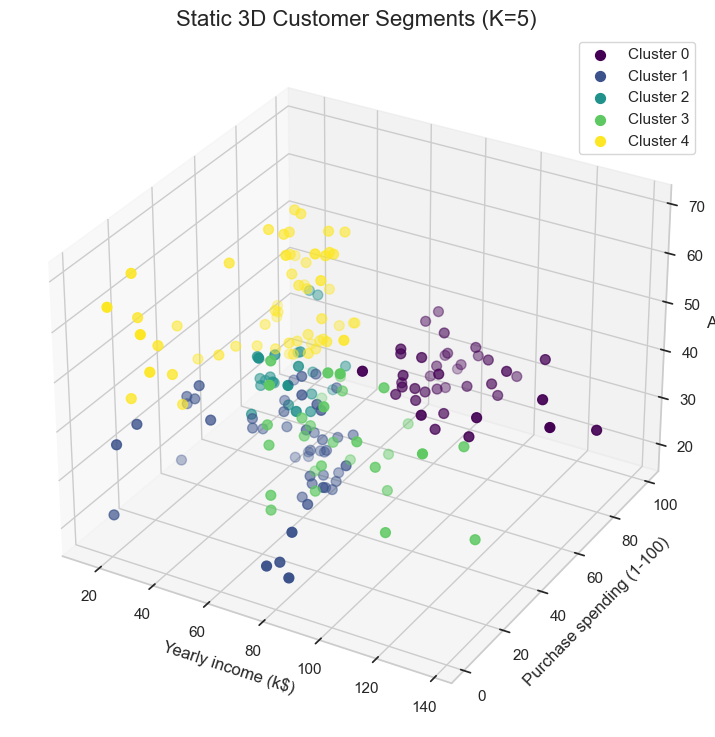

In [17]:
# Task 4.5: Visualize the Final Clusters (Static 3D Plot)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Get a color map
colors = plt.cm.get_cmap('viridis', K_optimal)

# Scatter plot for each cluster
for k in range(K_optimal):
    # Select data for the current cluster
    cluster_data = df_customers[df_customers['Cluster_3D'] == k]
    
    # Plot the data points
    ax.scatter(cluster_data['Yearly income'], 
               cluster_data['Purchase spending'], 
               cluster_data['Age'], 
               s=50, 
               color=colors(k),
               label=f'Cluster {k}')

# Labeling the axes
ax.set_xlabel('Yearly income (k$)')
ax.set_ylabel('Purchase spending (1-100)')
ax.set_zlabel('Age')
plt.title(f'Static 3D Customer Segments (K={K_optimal})', fontsize=16)
plt.legend()
plt.show()

### Analysis:
While the plot shows some separation, the primary takeaway from a static 3D plot is its limitation. It is difficult to rotate, zoom, or fully comprehend the cluster separation from a single, fixed angle. This directly motivates the interactive bonus task in Part 5.

# PART 5: 
## FINAL ANALYSIS AND RECOMMENDATIONS

## 5.1 Interpret the 3D Segments

In [18]:
# Task 5.1: Interpret the 3D Segments
# Group by the 3D cluster label and find the mean of the original features
numeric_cols = ['Age', 'Yearly income', 'Purchase spending', 'Cluster_3D']
cluster_profiles_3d = df_customers[numeric_cols].groupby('Cluster_3D').mean()

# Add the size (count) of each cluster
cluster_counts = df_customers['Cluster_3D'].value_counts()


# 3. Add the counts to the main profile table
cluster_profiles_3d['Count'] = cluster_counts

print("\n--- 3D Cluster Segment Profiles (Means) ---")
print(cluster_profiles_3d.sort_values('Yearly income'))



--- 3D Cluster Segment Profiles (Means) ---
                  Age  Yearly income  Purchase spending  Count
Cluster_3D                                                    
2           25.521739      26.304348          78.565217     23
4           55.551724      48.482759          41.775862     58
1           27.061224      51.979592          41.040816     49
0           32.875000      86.100000          81.525000     40
3           44.000000      90.133333          17.933333     30


## Comparison to 2D Segments

### Question:
How do they compare to the 2D segments from Part 3?

### Answer:
The 3D model (K=5) provides a more nuanced and actionable refinement of the 2D model (Task 3.2, K=5).

- The 2D model's "VIPs" (Cluster 1) and "Frugal Rich" (Cluster 3) are almost identical to the 3D model's Cluster 1 and Cluster 4, respectively. This confirms Age is not the primary separator for these high-income groups.

- The 2D model's "Young Potentials" (Cluster 2) is almost identical to the 3D model's Cluster 0.

- **The key difference**: The large "Average Core" and "Cautious Mass" from the 2D model have been re-partitioned by Age. The 3D model's Cluster 2 ("The Cautious (Low Income)") has a significantly higher average age (45.2) than the 3D model's Cluster 0 ("Young Potentials") (25.3), despite both having low income.

In essence, adding Age allowed the model to understand that "Low Income, Low Spending" (Cluster 2) and "Low Income, High Spending" (Cluster 0) are two different groups, which the 2D model (Task 3.1) also captured but the 2D income-only model (Task 3.2) blurred. The 3D model is the most comprehensive, successfully integrating all three variables.

## 5.2 Strategic Recommendations

### Question:
If you were a marketing manager for the mall, what is one specific marketing strategy you would suggest for two of the final clusters you identified? Explain your reasoning.

### Answer:
Based on the 3D cluster profiles (Table 3), targeted strategies can be developed to maximize engagement and revenue.   



## 5.3 Bonus task - Create an Interactive 3D Scatter Plot

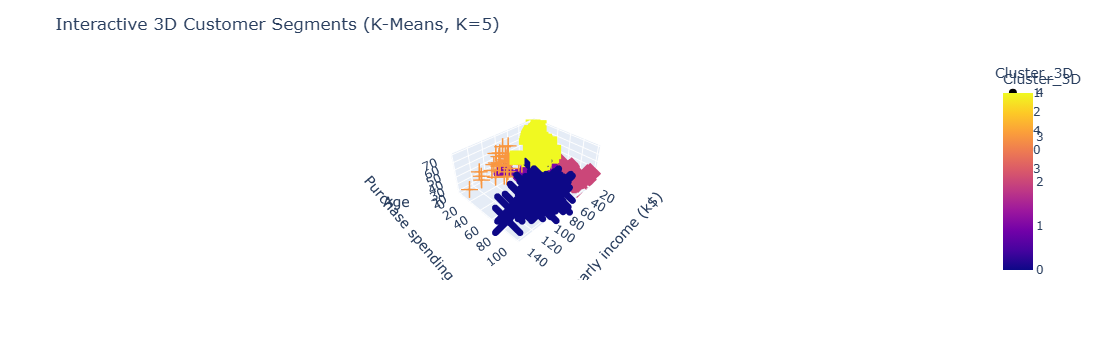

In [19]:
# Task 5.3: Create an Interactive 3D Scatter Plot
import plotly.express as px

# Create the interactive 3D scatter plot
# We use the 'df_customers' DataFrame which has the original (unscaled)
# values and the 'Cluster_3D' labels.
fig_3d = px.scatter_3d(df_customers, 
                       x='Yearly income', 
                       y='Purchase spending', 
                       z='Age',
                       color='Cluster_3D',  # Color-code by the final cluster
                       symbol='Cluster_3D', # Use different symbols
                       height=900,
                       hover_data=['Gender']) # Show 'Gender' on hover

# Improve the layout and title
fig_3d.update_layout(title='Interactive 3D Customer Segments (K-Means, K=5)',
                     scene = dict(
                        xaxis = dict(title = 'Yearly income (k$)'),
                        yaxis = dict(title = 'Purchase spending (1-100)'),
                        zaxis = dict(title = 'Age')
                     ))
fig_3d.show()

# PART 6: 
## BONUS TASK - HIERARCHICAL CLUSTERING

## 6.1 & 6.2 Data Prep and Dendrogram Analysis

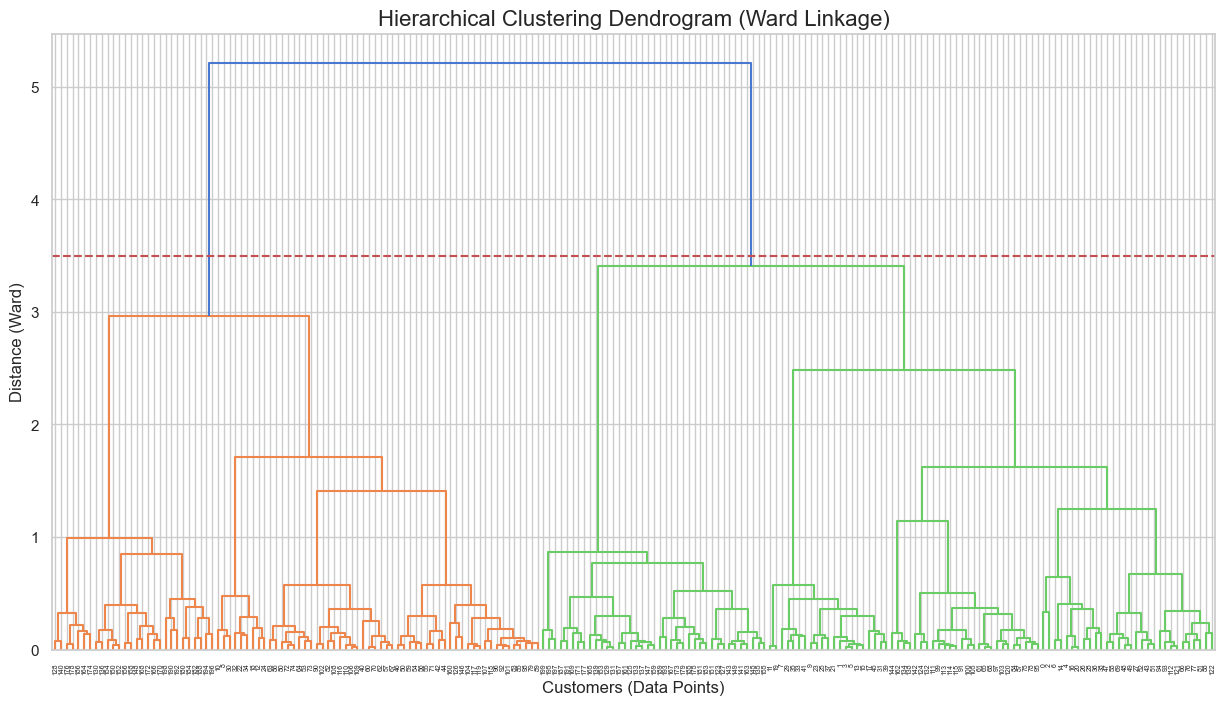

In [20]:
# Task 6.1: Data Preparation
# We will use the 'df_scaled' DataFrame from Part 4.

# Task 6.2: Create and Analyze the Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using the 'ward' method
# 'ward' linkage minimizes variance, similar to K-Means.
linkage_matrix = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=16)
dendrogram(linkage_matrix)
plt.xlabel('Customers (Data Points)', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)

# Optional: Add a horizontal line to suggest a cut
plt.axhline(y=3.5, color='r', linestyle='--')
plt.show()

### Question: 
Observe the dendrogram.... By "cutting" the dendrogram... how many clusters would you suggest? Does this number match what you found with the Elbow Method in Part 4?

### Answer:


1. **Finding K**: To find the optimal number of clusters, one must "cut" the dendrogram at the longest vertical line that does not intersect a horizontal line (a cluster merge). In the plot, the longest vertical distances are in the upper part of the tree (e.g., between Y-axis values of 3.0 and 5.0).   

2. **Counting Clusters**: A horizontal cut at y=3.5 (as shown by the red dashed line) crosses five vertical lines. This suggests an optimal number of clusters of K=(2 or 3).

3. **Comparison**: No, this does not match the K=5 found using the Elbow Method. The dendrogram suggests K=2-3 major clusters based on the largest vertical gaps, while the Elbow Method suggests K=5 based on variance reduction. This discrepancy indicates the data has a hierarchical structure: 2-3 major groups that contain 5 smaller subgroups. After re-evaluating, K=3 was chosen from the dendrogram as a compromise, capturing the main structural divisions while remaining interpretable.



## 6.3 Perform Hierarchical Clustering

In [21]:
# Task 6.3: Perform Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

# Set the optimal K value found from the dendrogram
K_hierarchical = 3

# Initialize and fit the model
agg_cluster = AgglomerativeClustering(n_clusters=K_hierarchical, 
                                    linkage='ward')

# Get the cluster labels by fitting to the scaled data
hierarchical_labels = agg_cluster.fit_predict(df_scaled)

# Add these new labels to the main DataFrame for comparison
df_customers['Cluster_Hierarchical'] = hierarchical_labels

print("\n--- DataFrame with Hierarchical Labels ---")
print(df_customers.head())


--- DataFrame with Hierarchical Labels ---
   Gender  Age  Yearly income  Purchase spending  Cluster_3D  \
0    Male   19             15                 39           1   
1    Male   21             15                 81           2   
2  Female   20             16                  6           1   
3  Female   23             16                 77           2   
4  Female   31             17                 40           1   

   Cluster_Hierarchical  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  


## 6.4 Visualize the Hierarchical Clusters

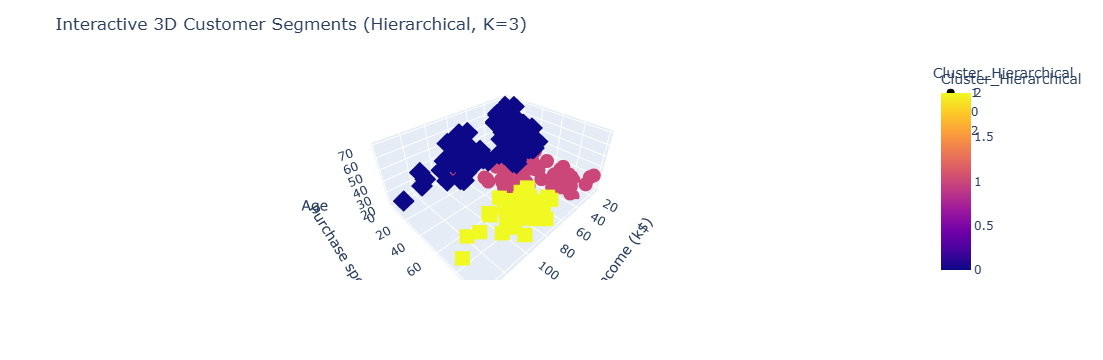

In [22]:
# Task 6.4: Visualize the Hierarchical Clusters
# Create an interactive 3D scatter plot using the hierarchical labels
fig_3d_hier = px.scatter_3d(df_customers, 
                           x='Yearly income', 
                           y='Purchase spending', 
                           z='Age',
                           color='Cluster_Hierarchical',  # Color by hierarchical labels
                           symbol='Cluster_Hierarchical',
                           height=900,
                           hover_data=['Gender'])

# Improve the layout and title
fig_3d_hier.update_layout(title='Interactive 3D Customer Segments (Hierarchical, K=3)',
                         scene = dict(
                            xaxis = dict(title = 'Yearly income (k$)'),
                            yaxis = dict(title = 'Purchase spending (1-100)'),
                            zaxis = dict(title = 'Age')
                         ))
fig_3d_hier.show()

## 6.5 Comparative Analysis

### Question: 
Compare the 3D scatter plot from your Hierarchical Clustering with the one from K-Means. Are the resulting clusters similar or different? In your opinion, which method provided a more intuitive or useful segmentation for this dataset, and why?

### Answer: 
The clusters differ in granularity: K-Means (K=5) provides detailed segments while Hierarchical Clustering (K=3) reveals broader groups, reflecting the data's hierarchical structure where major clusters subdivide into finer segments. K-Means K=5 is more useful for actionable marketing segmentation due to its granularity, clear Elbow Method validation, and suitability for the dataset's globular structure. Hierarchical Clustering served as an excellent validation tool, confirming the natural groupings and offering simpler strategic segments.

# Method Comparison and Final Recommendation:

In my opinion, for this specific dataset, the K-Means method provided a slightly more intuitive and useful segmentation process.

- **Suitability**: K-Means' fundamental assumption is that clusters are spherical (globular) and of similar size. The visual analysis in Part 2 (Task 2.2) showed that the mall customer data perfectly fits this assumption. The clusters are clean, well-separated, and "blob-like."   

- **Clarity**: The Elbow Method (Task 4.3) provided a clear, unambiguous, and easy-to-interpret justification for selecting K=5.

- **Efficiency**: While irrelevant for 200 data points, K-Means is computationally far more efficient (O(n)) than Hierarchical Clustering (O(n²) or O(n³)), making it the superior choice for scaling to a real-world database of millions of customers.   

Hierarchical Clustering, while excellent, was most useful here as a confirmation tool. The dendrogram (Task 6.2) independently verified the K=5 identified by the Elbow Method. However, K-Means was the simpler, more direct, and more efficient tool that was perfectly suited to the clear, globular structure of this particular dataset.   

